In [2]:
import os
import numpy as np
from matplotlib import pyplot


In [3]:
data = np.genfromtxt('/content/DATASET_autos_preparado.csv', delimiter=',')
X, y = data[0:, 0:7], data[:,7]
m = y.size

Le agregamos una columna de unos

In [4]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Utilizamos la ecuacion de la normal y que cumple los requisitos y nos permitira tener una mayor presicion

In [5]:
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

calculamos los valores de theta

In [6]:
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

Theta calculado a partir de la ecuación de la normal: [-1.43391774e+06 -3.09222447e+02  7.24037847e+02  2.36088822e+03
  1.59198183e+03 -4.39810655e+03  4.03191390e+03 -3.66137303e+03]


In [7]:
data = np.genfromtxt('/content/DATASET_TEST.csv', delimiter=',')
X_test, y_test = data[0:, 0:7], data[:,7]
m=y_test.size

In [8]:
X_test = np.asarray(X_test)
print(X_test.shape)
X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)

(15, 7)


El entrenamiento se realizo borrando datos con costo mayores a 100.000

In [9]:
prices=[]
for x_t in X_test:
    prices.append(int(np.dot(x_t, theta)))

print('precios Predecidos (usando la ecuación de la normal): $')
print(prices)


precios Predecidos (usando la ecuación de la normal): $
[22137, 18569, 13674, 6635, 24911, 8227, 13870, 24347, 20900, 24478, 6138, 15977, 5738, 8259, 21767]


In [15]:
y_test

array([ 9800.,  8700.,  9700.,  9600.,  7000.,  9600.,  9100., 10200.,
        9500.,  8300.,  8000.,  9500.,  7000.,  7000., 10300.])

Probamos con todo los datos sin realizar el borrado de elementos con mayores a 100.000

In [10]:
data = np.genfromtxt('/content/DATASET_autos_preparado_sin_borrar.csv', delimiter=',')
X2, y2 = data[0:, 0:7], data[:,7]
m = y2.size

In [11]:
X2 = np.concatenate([np.ones((m, 1)), X2], axis=1)

In [12]:
theta2 = normalEqn(X2, y2);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

Theta calculado a partir de la ecuación de la normal: [-1.43391774e+06 -3.09222447e+02  7.24037847e+02  2.36088822e+03
  1.59198183e+03 -4.39810655e+03  4.03191390e+03 -3.66137303e+03]


In [13]:
prices=[]
for x_t in X_test:
    prices.append(int(np.dot(x_t, theta2)))

print('precios Predecidos (usando la ecuación de la normal): $')
print(prices)

precios Predecidos (usando la ecuación de la normal): $
[66245, 72095, 58068, 21037, 52147, 37724, 63151, 75486, 68182, 60529, 20197, 47164, 9284, 58740, 68345]


In [14]:
y_test

array([ 9800.,  8700.,  9700.,  9600.,  7000.,  9600.,  9100., 10200.,
        9500.,  8300.,  8000.,  9500.,  7000.,  7000., 10300.])

intentamos resolver el problema con una regresion con datos normalizados 

In [16]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [17]:
data = np.genfromtxt('/content/DATASET_autos_preparado.csv', delimiter=',')
X_reg, y_reg = data[0:, 0:7], data[:,7]
m = y_reg.size

In [18]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_reg)

print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

Media calculada: [1.21165480e+01 2.01168060e+03 1.92170819e+00 4.30516014e+00
 1.43772242e+00 1.07473310e+00 1.85676157e+00]
Desviación estandar calculada: [7.84422018 7.41057826 0.81528455 0.83853481 0.49610634 0.28876104
 0.35031584]
[[-1.28968181 -0.09184236  0.09603005 ...  1.13338116 -0.25880603
   0.4088837 ]
 [-1.28968181  0.58286882  0.09603005 ... -0.88231571 -0.25880603
  -2.44568323]
 [-1.28968181  0.58286882  1.32259567 ...  1.13338116 -0.25880603
   0.4088837 ]
 ...
 [ 0.62255417 -1.44126472  0.09603005 ...  1.13338116 -0.25880603
   0.4088837 ]
 [-0.01485782 -3.60034049 -1.13053557 ... -0.88231571 -0.25880603
   0.4088837 ]
 [-0.01485782 -3.60034049 -1.13053557 ...  1.13338116 -0.25880603
   0.4088837 ]]


In [19]:
X_r = np.insert(X_norm,0, 1, axis=1)
X_r

array([[ 1.        , -1.28968181, -0.09184236, ...,  1.13338116,
        -0.25880603,  0.4088837 ],
       [ 1.        , -1.28968181,  0.58286882, ..., -0.88231571,
        -0.25880603, -2.44568323],
       [ 1.        , -1.28968181,  0.58286882, ...,  1.13338116,
        -0.25880603,  0.4088837 ],
       ...,
       [ 1.        ,  0.62255417, -1.44126472, ...,  1.13338116,
        -0.25880603,  0.4088837 ],
       [ 1.        , -0.01485782, -3.60034049, ..., -0.88231571,
        -0.25880603,  0.4088837 ],
       [ 1.        , -0.01485782, -3.60034049, ...,  1.13338116,
        -0.25880603,  0.4088837 ]])

In [20]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [21]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))
  return theta, J_historico

In [30]:
theta = np.zeros(8)

num_ite = 2000
alpha = 0.003

theta, J_historico = calcularDescensoGradiente(X_r, y_reg, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

los valores de theta calculados son: [21418.05326995 -2411.77460673  5335.97455903  1918.97717309
  1336.22011505 -2182.28003927  1156.9493525  -1296.9396697 ]
con un costo de: 69227555.94827318 


Text(0, 0.5, 'Costo J')

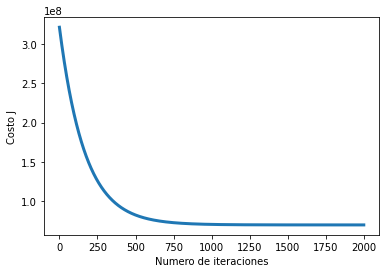

In [31]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=3)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [41]:
data_test = np.genfromtxt('/content/DATASET_TEST.csv', delimiter=',')
X_test, y_test = data_test[0:, 0:7], data_test[:,7]
m=y_test.size
X_test = np.asarray(X_test)
print(X_test.shape)


(15, 7)


In [42]:
test_norm = (X_test - mu) / sigma
test_norm = np.concatenate([np.ones((m, 1)), test_norm], axis=1)
test_norm

array([[ 1.        , -0.90723461, -1.17138025,  1.32259567,  0.82863567,
        -0.88231571, -0.25880603,  0.4088837 ],
       [ 1.        ,  1.00500136, -0.09184236, -1.13053557,  0.82863567,
        -0.88231571, -0.25880603,  0.4088837 ],
       [ 1.        ,  1.76989575, -0.36172683, -1.13053557, -0.36392066,
        -0.88231571, -0.25880603,  0.4088837 ],
       [ 1.        ,  0.11262457, -1.30632248, -1.13053557, -1.55647699,
         1.13338116, -0.25880603,  0.4088837 ],
       [ 1.        , -1.03471701,  0.98769553, -1.13053557,  0.82863567,
         1.13338116, -0.25880603,  0.4088837 ],
       [ 1.        ,  0.11262457, -1.30632248, -1.13053557, -0.36392066,
         1.13338116, -0.25880603,  0.4088837 ],
       [ 1.        ,  2.02486055,  0.31298435, -1.13053557,  0.82863567,
         1.13338116, -0.25880603,  0.4088837 ],
       [ 1.        ,  1.38744856,  0.71781106,  0.09603005,  0.82863567,
        -0.88231571, -0.25880603,  0.4088837 ],
       [ 1.        , -0.39730502

In [45]:
y_pred = np.dot(test_norm, theta)
y_preds=[]
for ypred in y_pred:
    y_preds.append(int(ypred))
print(y_preds)

[22096, 18537, 13659, 6623, 24818, 8217, 13839, 24289, 20866, 24391, 6144, 15996, 5732, 8286, 21717]


In [46]:
y_test

array([ 9800.,  8700.,  9700.,  9600.,  7000.,  9600.,  9100., 10200.,
        9500.,  8300.,  8000.,  9500.,  7000.,  7000., 10300.])